In [1]:
#Implement L2 regularization on cat-dog classification neural network. Train the model on the
#dataset, and observe the impact of the regularization on the weight parameters. (Do not use
#data augmentation).
#a. L2 regularization using optimizer’s weight decay
#b. L2 regularization using loop to find L2 norm of weights

In [2]:
print("Helo world")

Helo world


In [3]:
#without normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.Sigmoid())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = '../week6/data/alexdata/train'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
print("Reached")
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
model = neural_net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
print("Training")
for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print("Loss for epoch ", epoch,": ",running_loss)
    losses.append(running_loss)


Reached
Training
Loss for epoch  0 :  43.591450452804565
Loss for epoch  1 :  43.35711348056793
Loss for epoch  2 :  43.39333301782608
Loss for epoch  3 :  43.22561764717102
Loss for epoch  4 :  42.11349892616272
Loss for epoch  5 :  42.37434035539627


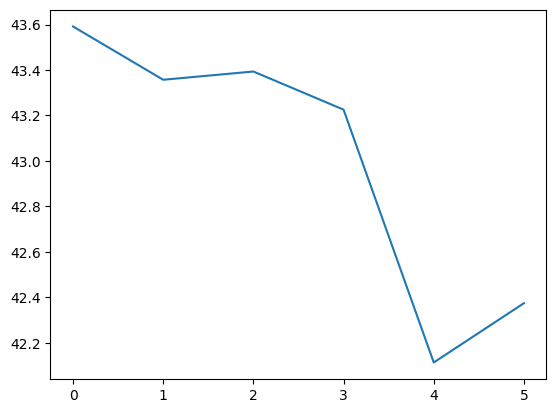

In [5]:
#loss plot without normalization
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, len(losses))], losses)
plt.show()

In [ ]:
#with L2 normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.ReLU())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = '../week6/data/alexdata/train'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.1)
model = neural_net()

for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))
    losses.append(running_loss)

In [ ]:
#loss plot with normalization
import matplotlib.pyplot as plt

plt.plot([i for i in range(0, len(losses))], losses)
plt.show()

In [ ]:
#loop implmenetation
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.ReLU())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,  weight_decay=0.1)
model = neural_net()
for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        loss = loss_fn(outputs, labels)
        l2_lambda = 0.001
        l2_norm = sum(p.pow(2).sum() for p in model.parameters())
        loss = loss + l2_norm*l2_lambda
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
    print('[%d] loss: %.3f' %(epoch + 1, running_loss))

In [ ]:
#Implement L1 regularization on cat-dog classification neural network. Train the model on the
#dataset, and observe the impact of the regularization on the weight parameters. (Do not use
#data augmentation).
#a. L1 regularization using optimizer’s weight decay (part A not possible?)
#b. L1 regularization using loop to find L1 norm of weights

In [ ]:
#with L1 normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Dropout(0.1),
                             nn.Linear(6000, 1200, bias = True),
                             nn.Dropout(0.1),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.Dropout(0.1)
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.Dropout(0.1)
                             nn.ReLU())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
model = neural_net()

for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.size())
        loss = loss_fn(outputs.flatten(), labels)
        l1_weight = 1.0
        l1_parameters = []
        for parameter in mlp.parameters():
          l1_parameters.append(parameter.view(-1))
        l1 = l1_weight * mlp.compute_l1_loss(torch.cat(l1_parameters))
        loss += l1
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if(i%30 == 0):
            print('[%d, %d] loss: %.3f' %(epoch + 1, i, loss.item()))

In [ ]:
#without normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.Sigmoid())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
loss_fn = nn.BCELoss()
model = neural_net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if(i%30 == 0):
            print('[%d, %d] loss: %.3f' %(epoch + 1, i, loss.item()))


In [ ]:
#dropout using bernoulli distribution

In [ ]:
#early stopping
#without normalization
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import Dataset,DataLoader

class neural_net(nn.Module):
    def __init__(self):
        super(neural_net, self).__init__()
        self.model = nn.Sequential(nn.Linear(3*100*100, 6000, bias = True),
                             nn.ReLU(),
                             nn.Linear(6000, 1200, bias = True),
                             nn.ReLU(),
                             nn.Linear(1200, 100, bias = True),
                             nn.ReLU(),
                             nn.Linear(100, 1, bias = True),
                             nn.Sigmoid())
    def forward(self,x):
        x = x.view(-1, 30000)
        return self.model(x)

losses = []
directory = 'cats_and_dogs_filtered/train/'
test_directory = 'cats_and_dogs_filtered/test/'
transform = transforms.Compose([transforms.Resize((100,100)),transforms.ToTensor()])
dataset = ImageFolder(directory, transform=transform)
test_set = ImageFolder(test_directory, transform=transform)
#img, label = dataset[0]
#print(img.shape, label)
batch_size = 32
train_loader = DataLoader(dataset, batch_size, shuffle=True)
test_loader = DataLoader(dataset, batch_size, suffle=True)
loss_fn = nn.BCELoss()
model = neural_net()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
best_validation_loss = None
patience = 10
current_patience = 0
for epoch in range(6):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        model.train()
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        #print(inputs.size())
        #print(labels.size())
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        running_loss += loss.item()
      print("Loss for epoch ", epoch,": ",running_loss)
      losses.append(running_loss)
      modal.eval()
      validation_loss = 0
      for j, data in ennumerate(test_loader, 0):
        inputs, labels = data
        labels = labels.float().unsqueeze(1)
        with torch.no_grad():
          outputs = model(inputs)
          loss = loss_fn(outputs.flatten(), labels)
          validation_loss += loss.item()
      validation_loss/=len(test_loader)
      if best_validation_losss = None or best_validation_loss > validation_loss:
        best_validation_loss = 0
        current patience = 0
      elif best_validation_loss < validation_loss:
        current_patience += 1
        if current_patience > patience:
          print("Early stopping")
          break

